In [3]:
from mylibrary import * 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining constants
p = 5.95
a = 6.254
b = 0.05422
R = 0.0821
T = 300

In [4]:
def V_func1(p, V, a, b, R, T):
    V_new = b + (R*T)/(p + a/V**2)
    return V_new

def V_func2(p, V, a, b, R, T):
    denom = (R*T)/(V-b)-p
    V_new = (a/denom)**0.5
    return V_new

In [6]:
def fixed_point_exp(func, initial_guess, tolerance=1e-5, max_iterations=100):
    x_n = initial_guess
    num = 0
    num_list = [num]
    xn_list = [initial_guess]

    for i in range(max_iterations):
        x_next = func(p, -x_n, a, b, R, T)
        
        xn_list.append(x_next)
        num_list.append(num)

        if abs(x_next - x_n) < tolerance:
            break

        x_n = x_next
        num+=1

    return num_list, xn_list

The solution, accurate to 5 decimal places, is: 3.92995


Text(0, 0.5, 'Value of root')

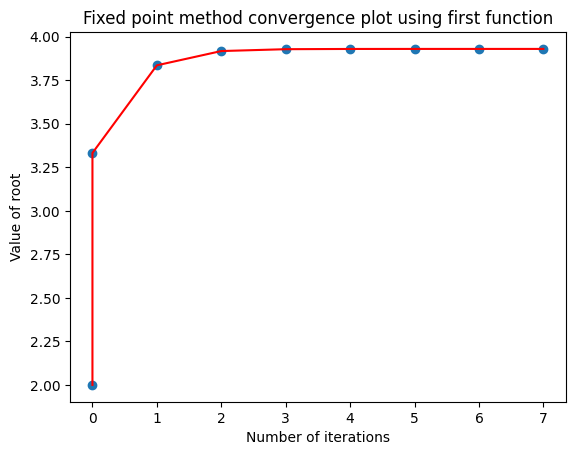

In [7]:
# Make an initial guess
x_0 = 2.0

# Solving the equation using the fixed point method for the first function
iter_list, solution = fixed_point_exp(V_func1, x_0)

# Display the result
if solution is not None:
    print(f"The solution, accurate to 5 decimal places, is: {solution[len(solution)-1]:.5f}")
else:
    print("The method did not converge within the specified number of iterations")

plt.scatter(iter_list, solution)
plt.plot(iter_list, solution, 'r-')
plt.title('Fixed point method convergence plot using first function')
plt.xlabel('Number of iterations')
plt.ylabel('Value of root')

The solution, accurate to 5 decimal places, is: 0.11672-0.24182j


Text(0, 0.5, 'Value of root')

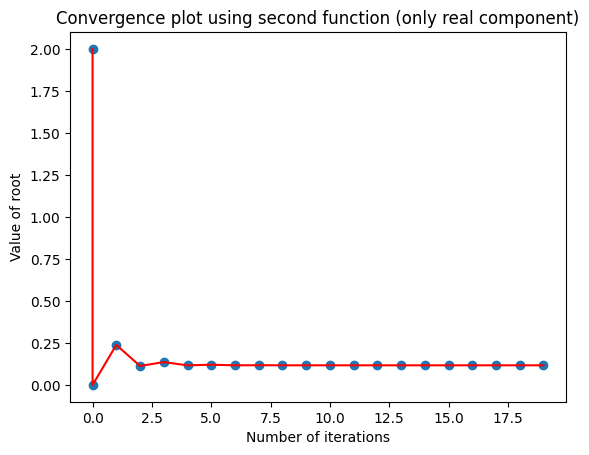

In [9]:
# Make an initial guess
x_0 = 2.0
Vol = (a/((R*T)/(x_0-b)-p))**0.5
# Solving the equation using the fixed point method for the first function
iter_list, solution = fixed_point_exp(V_func2, x_0, 1e-5, 20)

# Display the result
if solution is not None:
    print(f"The solution, accurate to 5 decimal places, is: {solution[len(solution)-1]:.5f}")
else:
    print("The method did not converge within the specified number of iterations")

plt.scatter(iter_list, solution)
plt.plot(iter_list, solution, 'r-')
plt.title('Convergence plot using second function (only real component)')
plt.xlabel('Number of iterations')
plt.ylabel('Value of root')